Zhu, Zhaoyang

1002321445

# Q1{.unnumbered}

## a). {.unnumbered}


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
# Q1 a).
# using Riemann sum
def g(x, theta=0):
    if np.sin(x - theta) == 0:
        return 0
    return (np.sin(5 * (x -  theta))**2) / (25 * np.sin(x - theta)**2)

def integral(x, theta=0, sd=4):
    px = st.norm.pdf(x, theta, sd)
    return px - px * g(x)

x, spacing = np.linspace(start=-20, stop=20, num=10000, retstep=True)
result = 0
for i in x:
    result += integral(i) * spacing
print("The fraction of photon that get obsorbed on average is %s"%(round(result, 6)))


The fraction of photon that get obsorbed on average is 0.799999


## b). {.unnumbered}

>$p(x, g=1 | \theta=0) = p(g=1 | x, \theta=0)p(x | \theta=0) = p(x | \theta=0)f(x, \theta=0)$

>We know that $p(g | x, \theta=0) \leq 1$

>$\implies p(x)p(g | x, \theta=0) \leq p(x)$

>$\implies p(x | \theta)f(x, \theta)^g (1 - f(x, \theta))^{1 - g} \leq p(x | \theta)$

>Let $g = 1, \theta = 0$

>$\implies p(x | \theta=0)f(x, \theta=0) \leq p(x | \theta=0)$

>Therefore, we can use $p(x | \theta=0)$ to generate $p(x, g=1 | \theta=0)$

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,
         0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  2.,  0.,  2.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  2.,  1.,  2.,
         0.,  2.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,
         1.,  0.,  3.,  0.,  2.,  2.,  1.,  1.,  0.

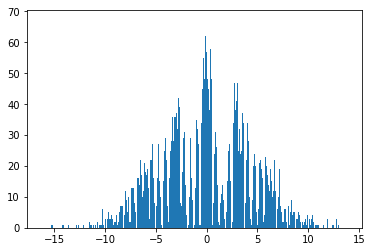

In [3]:
def rejection_sampling(success, theta=0, sd=4):
    result = np.array([]).reshape(0, 2)
    accept = 0
    tryout = 0
    while success > 0:
        tryout += 1
        x_i = np.random.normal(theta, sd)
        
        u_i = np.random.uniform(0, st.norm.pdf(x_i, theta, sd))
        if u_i <= g(x_i):
            result = np.concatenate((result, np.array([x_i, u_i]).\
                                     reshape(1, 2)))
            success -= 1
            accept += 1
    
    return result, accept/tryout

distribution, accept = rejection_sampling(10000)
plt.figure()
plt.hist(distribution[:, 0], bins=1000)

## c). {.unnumbered}

>$p(g=0 | \theta=0) = E(p(g=0 | \theta=0, x)) = \int p(x | \theta=0)p(g=0 | \theta=0, x)dx$\

>Let $p(x) = p(x | \theta=0), f(x) = p(g=0 | \theta=0, x), q(x) = p(x | \theta=0)$

>$\implies p(g=0 | \theta=0) = \frac{\sum_{i=1}^{n} f(x_i)}{n}$

In [10]:
def normalized_importance_sampler(n, theta=0, sd=4):
    x = np.random.normal(theta, sd, n)
    result = 0
    for i in x:
        result += 1 - g(i)
    return result / n

print("The fraction of photon that get obsorbed on average is %s"\
      %(round(normalized_importance_sampler(1000), 6)))

The fraction of photon that get obsorbed on average is 0.795266


## d). {.unnumbered}

>$p(x, g, \theta) = p(x, g | \theta)p(\theta)$

>$\implies p(x=1.7, g=1, \theta) = p(x=1.7, g=1 | \theta)p(\theta) = f(x=1.7, \theta)p(\theta) = \frac{\sin^2(5(1.7 - \theta))}{10\pi(1 + (\frac{\theta}{10}^2))25\sin^2(1.7 - \theta)}$


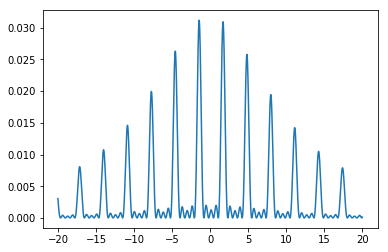

In [5]:
def theta_prior(theta):
    return 1 / (10 * np.pi + np.pi * theta**2 / 10 )

def joint_density(theta, x=1.7, a=1):
    return theta_prior(theta) * g(x, theta)**a * (1 - g(x, theta))**(1 - a)

new_x = np.linspace(start=-20, stop=20, num=5000)
y = np.array([])
for i in new_x:
    y = np.append(y, joint_density(i))

plt.figure()
plt.plot(new_x, y)

## e). {.unnumbered}

>$p(\theta | x, g) \propto p(x, g| \theta) p(\theta) = p(x, g, \theta)$


Text(0.5, 1.0, 'initial theta = 0, sd = 4, range(-20, 20)')

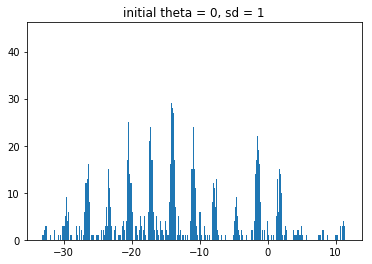

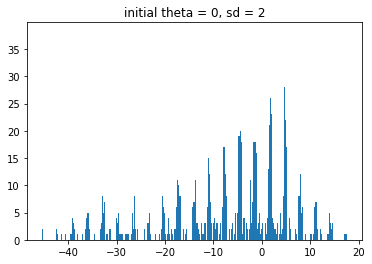

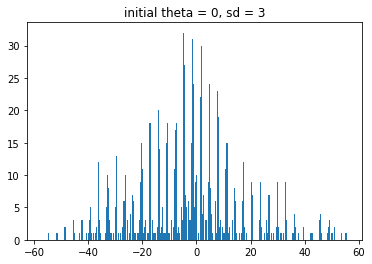

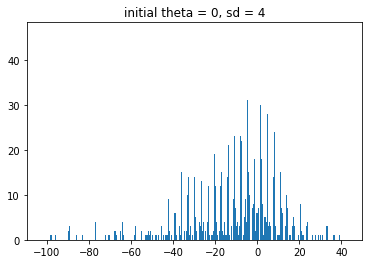

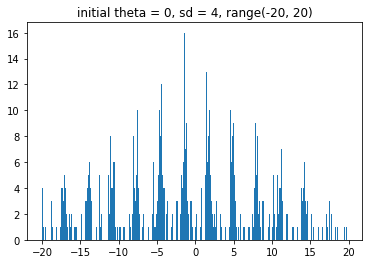

In [6]:
def mh_algo_normal(iteration, init, sd):
    curr_state = init
    result = [curr_state]
    while iteration > 0:
        u = np.random.uniform()
        prop = np.random.normal(curr_state, sd)
        top = st.norm.pdf(curr_state, prop, sd) * joint_density(prop)
        bot = st.norm.pdf(prop, curr_state, sd) * joint_density(curr_state)
        a = np.minimum(1, top / bot)
        if u < a:
            curr_state = prop
            result.append(curr_state)
        else:
            pass
        iteration -= 1
    return result

plt.figure()
mh_one = mh_algo_normal(10000, 0, 1)
plt.hist(mh_one, bins=1000)
plt.title("initial theta = 0, sd = 1")
plt.figure()
mh_two = mh_algo_normal(10000, 0, 2)
plt.hist(mh_two, bins=1000)
plt.title("initial theta = 0, sd = 2")
plt.figure()
mh_three = mh_algo_normal(10000, 0, 3)
plt.hist(mh_three, bins=1000)
plt.title("initial theta = 0, sd = 3")
plt.figure()
mh_four = mh_algo_normal(10000, 0, 4)
plt.hist(mh_four, bins=1000)
plt.title("initial theta = 0, sd = 4")
plt.figure()
plt.hist([i for i in mh_four if (i <= 20) & (i >= -20)], bins=1000)
plt.title("initial theta = 0, sd = 4, range(-20, 20)")

## f). {.unnumbered}


In [11]:
upper = len([i for i in mh_four if i < 3])
lower = len([i for i in mh_four if i < -3])

print("The estimate posterior probability is %s"\
      %(round((upper - lower) / len(mh_four), 6)))

The estimate posterior probability is 0.156618


# Q2). {.unnumbered}

## a). {.unnumbered}

>$E_{p(b |\theta)}[\triangledown_{\theta}log(p(b | \theta))] = E_{p(b |\theta)}[\frac{\triangledown_{\theta} p(b | \theta)}{p(b | \theta)}] = \int p(b | \theta)\frac{\triangledown_{\theta} p(b | \theta)}{p(b | \theta)}db = \int \triangledown_{\theta} p(b | \theta) = \triangledown_{\theta} \int p(b | \theta)db = \triangledown_{\theta}(1) = 0$

## b). {.unnumbered}

>$E_{p(b | \theta)} [f(b)\triangledown_{\theta} log(p(b | \theta))] = E_{p(b | \theta)} [f(b)\frac{\triangledown_{\theta} p(b | \theta)}{p(b | \theta)}] = \int f(b)\frac{\triangledown_{\theta} p(b | \theta)}{p(b | \theta)} p(b | \theta)db = \int f(b)\triangledown_{\theta}p(b | \theta)db$

> Since $f(b)$ is a function of b

>$\implies \int f(b)\triangledown_{\theta}p(b | \theta)db = \int \triangledown_{\theta}p(b | \theta)f(b)db = \triangledown_{\theta}\int p(b | \theta)f(b)db = \triangledown_{\theta}E_{p(b |\theta)}[f(b)]$

## c). {.unnumbered}

>$E_{p(b | \theta)} [(f(b) - c)\triangledown_{\theta} log(p(b | \theta))] = E_{p(b | \theta)} [(f(b) - c)\frac{\triangledown_{\theta} p(b | \theta)}{p(b | \theta)}] = \int (f(b) - c)\frac{\triangledown_{\theta} p(b | \theta)}{p(b | \theta)} p(b | \theta)db = \triangledown_{\theta}E_{p(x | \theta)}[f(b) - c] = \triangledown_{\theta} E_{p(x | \theta)}[f(b)] - \triangledown_{\theta} E_{p(x | \theta)}[c] = \triangledown_{\theta} E_{p(x | \theta)}[f(b)] - 0 = \triangledown_{\theta} E_{p(x | \theta)}[f(b)]$

## d). {.unnumbered}

>Let $c(b) = f(b)$

>From the rest of part 2, we know that $E_{p(b | \theta)} [(f(b) - c(b))\triangledown_{\theta} log(p(b | \theta))] = \triangledown_{\theta} E_{p(x | \theta)}[f(b) - c(b)]$

>Since $c(b) = f(b) \implies \triangledown_{\theta} E_{p(x | \theta)}[f(b) - f(b)] = 0 \neq \triangledown_{\theta} E_{p(x | \theta)}[f(b)]$ which means that the estimator is biased.

# Q3 {.unnumbered}

## a). {.unnumbered}

>$V(\hat L_{MC}) = V(\sum_{d=1}^{D} x_d) = V(x_1 + .... + x_d)$

>Since $x_d \sim_{i.i.d} N(\theta_d, 1)$

>$\implies V(x_1 + .... + x_d) = V(x_1) + ... + V(x_d) = 1 +... + 1 = D$

## b). {.unnumbered}

>$\hat g = [f(x) - c(\theta)] \triangledown_{\theta} log(\bar x |\theta) = [\sum_d x_d - \sum_d \theta_d] \triangledown_{\theta} (\sum_d -\frac{1}{2}(\bar x_d - \theta_d)^2)$

>Let $x_d = \bar\theta_d + \bar\epsilon_d$ and $\epsilon \sim N(0, 1)$

>$\implies \hat g_i = \sum_d (\theta_d + \epsilon_d - \theta_d) \triangledown_{\theta_i}(-\frac{1}{2}(\bar\theta_i + \bar\epsilon_i -\theta_i)^2) = \sum_d (\epsilon_d)(\bar\theta_i + \bar\epsilon_i - \theta_i) =  \epsilon_i\sum_d \epsilon_d$

>$\implies \hat g = \epsilon \sum_d \epsilon_d$

## c). {.unnumbered}

>$V(\hat g_1^{SF}) = V(\epsilon_1 \sum_{d}\epsilon_d) = V(\epsilon_1^2 + \epsilon_1\epsilon_2 + ... + \epsilon_1\epsilon_d)$

>Since $E(\epsilon^2) = V(\epsilon) + E^2(\epsilon) = 1 + 0 = 1$ and $\epsilon \sim_{i.i.d} N(0, 1)$

>$\implies V(\epsilon_1^2 + \epsilon_1\epsilon_2 + ... + \epsilon_1\epsilon_d) = V(\epsilon_1^2) + V(\epsilon_1\epsilon_2) + .. + V(\epsilon_1\epsilon_d) = E(\epsilon_1^4) - E^2(\epsilon_1^2) + E(\epsilon_1^2\epsilon_2^2) - E^2(\epsilon_1\epsilon_2) + ... + E(\epsilon_1^2\epsilon_d^2) - E^2(\epsilon_1\epsilon_d) =  E(\epsilon_1^4) - E^2(\epsilon_1^2) + E(\epsilon_1^2)E(\epsilon_2^2) - E^2(\epsilon_1)E^2(\epsilon_2) + ... + E(\epsilon_1^2)E(\epsilon_d^2) - E^2(\epsilon_1)E^2(\epsilon_d) = 3 - 1 + (D - 1) * 1 = 1 + D$

## d). {.unnumbered}

>$\triangledown_\theta(L(\theta)) = E_{x \sim_{i.i.d}N(\theta, I)}(\triangledown_\theta \sum_d x_d)$

>Let $x = \theta + \epsilon$

>$\triangledown_{\theta_i} \sum_d x_d = \frac{d(\sum_d \theta_d+ \epsilon_d)}{d\theta_i + \epsilon_i}\frac{d(\theta_i + \epsilon_i)}{d\theta_i} = 1 * 1 = 1 \implies \hat g(f) = [\triangledown_{\theta_i}\sum_d x_d ... \triangledown_{\theta_d}\sum_d x_d]^T = [1 .... 1]^T$

>$\implies V(\hat g_1) = 0$